In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error

In [12]:
df=pd.read_csv('bank.csv')

In [13]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Feature Defination Type Age Customer's age Numeric: '59','34','32' Job Customer's 
job Categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired'..) 
Marital Customer's marital status Categorical: 'divorced','married','single','unknown' 
Education Customer education level Categorical: 'primary', 'secondary', 'tertiary' ve 'unknown' 
Default Does the customer already have a loan? Categorical: 'no','yes' 
Housing Does the client have a home loan? Categorical: 'no','yes' 
Loan Does the customer have a personal loan? Categorical: 'no','yes' 
Balance Customer's individual balance Numeric: '1270','2343','45' 
Contact Customer's contact type Categorical: 'cellular','telephone','unknown' 
Month Last contact month of the year Categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec' 
Day Last contact day of the week 
Duration Last contact time, in seconds Numeric 
Campaign Number of contacts performed during this campaign and for this customer Numeric 
Pdays Number of days since the customer was last contacted from a previous campaign Numeric (probably -1 means the customer has not been contacted before) 
Previous Number of contacts performed before this campaign and for this customer Numeric 
Poutcome Result of previous marketing campaign Categorical: 'failure','nonexistent','success','other' 
Deposit -did the customer get a loan? Binary: 'yes','no'

In [14]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

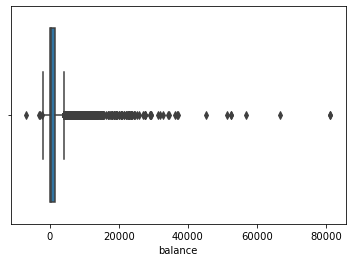

In [15]:
sns.boxplot(df['balance'])

In [16]:
q1=df['balance'].quantile(0.25)

In [17]:
q3=df['balance'].quantile(0.75)

In [18]:
IQR=q3-q1

In [19]:
lower=q1-1.5*IQR

In [20]:
upper=q3+1.5*IQR

In [21]:
df=df[(df['balance']>lower) & (df['balance']<upper)]

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

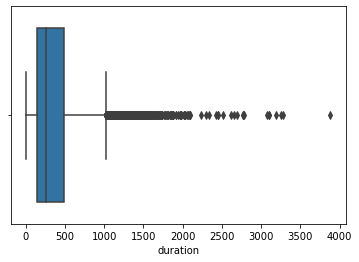

In [22]:
sns.boxplot(df['duration'])

In [23]:
q1=df['duration'].quantile(0.25)

In [24]:
q3=df['duration'].quantile(0.75)

In [25]:
IQR=q3-q1

In [26]:
lower=q1-1.5*IQR

In [27]:
upper=q3+1.5*IQR

In [28]:
df=df[(df['duration']>lower) & (df['duration']<upper)]

In [29]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

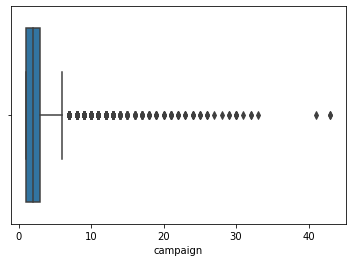

In [30]:
sns.boxplot(df['campaign'])

In [31]:
q1=df['campaign'].quantile(0.25)

In [32]:
q3=df['campaign'].quantile(0.75)

In [33]:
IQR=q3-q1

In [34]:
lower=q1-1.5*IQR

In [35]:
upper=q3+1.5*IQR

In [36]:
df=df[(df['campaign']>lower) & (df['campaign']<upper)]

In [37]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pdays'>

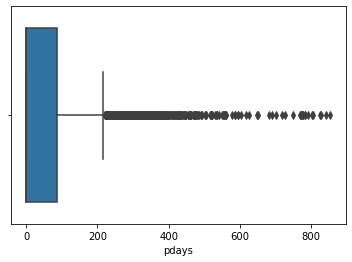

In [38]:
sns.boxplot(df['pdays'])

In [39]:
q1=df['pdays'].quantile(0.25)

In [40]:
q3=df['pdays'].quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
lower=q1-1.5*IQR

In [43]:
upper=q3+1.5*IQR

In [44]:
df=df[(df['pdays']>lower) & (df['pdays']<upper)]

In [45]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

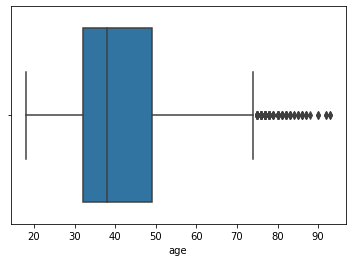

In [46]:
sns.boxplot(df['age'])

In [47]:
q1=df['age'].quantile(0.25)

In [48]:
q3=df['age'].quantile(0.75)

In [49]:
IQR=q3-q1

In [50]:
lower=q1-1.5*IQR

In [51]:
upper=q3+1.5*IQR

In [52]:
df=df[(df['age']>lower) & (df['age']<upper)]

In [53]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

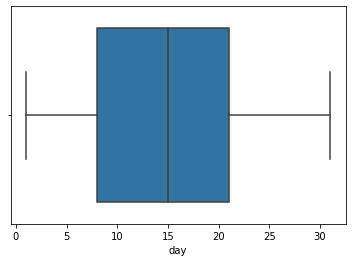

In [54]:
sns.boxplot(df['day'])

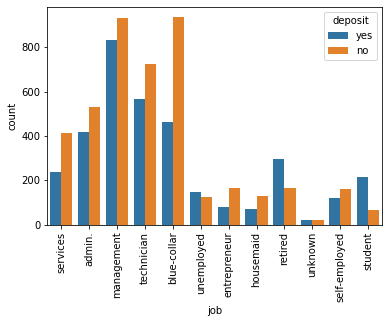

In [55]:
sns.countplot(x=df['job'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

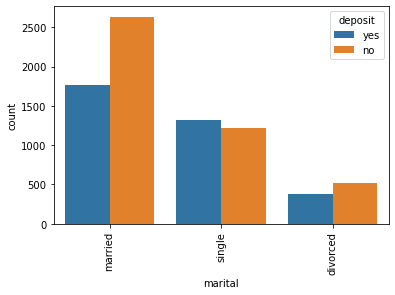

In [56]:
sns.countplot(x=df['marital'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

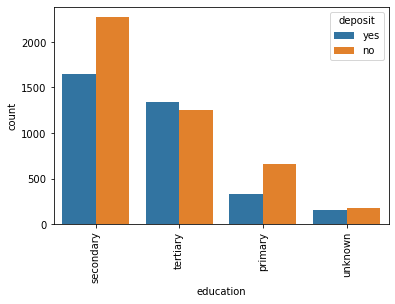

In [57]:
sns.countplot(x=df['education'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

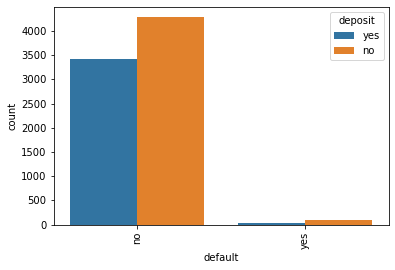

In [58]:
sns.countplot(x=df['default'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

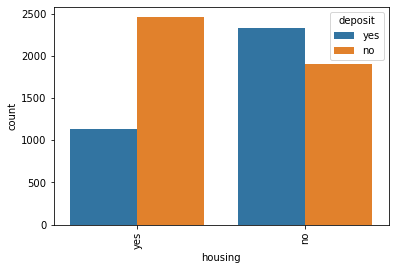

In [59]:
sns.countplot(x=df['housing'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

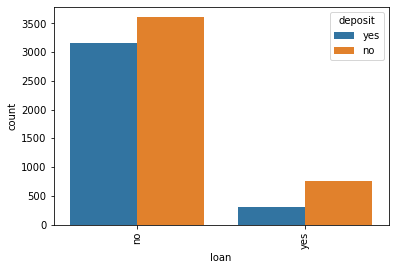

In [60]:
sns.countplot(x=df['loan'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

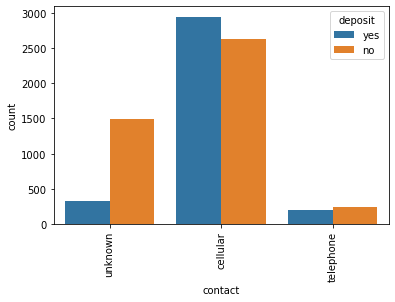

In [61]:
sns.countplot(x=df['contact'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

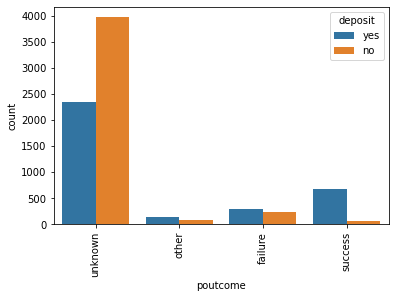

In [62]:
sns.countplot(x=df['poutcome'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

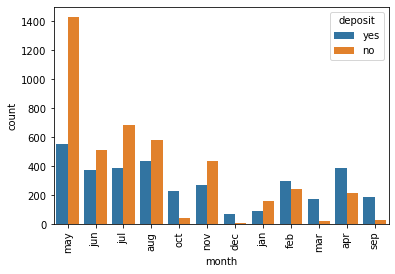

In [63]:
sns.countplot(x=df['month'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

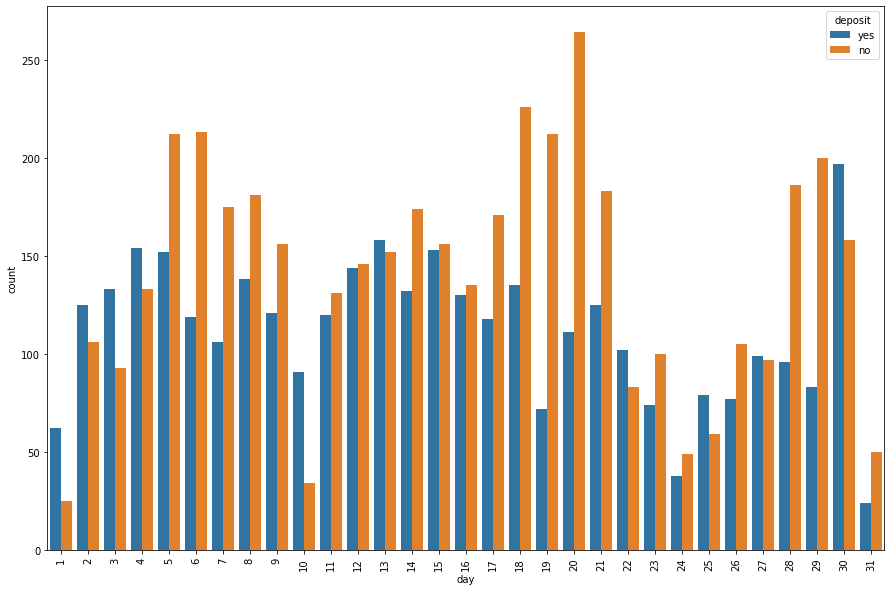

In [64]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['day'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

In [65]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [66]:
new_customer_df=df.groupby('pdays').get_group(-1)


In [67]:
new_customer_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit', ylabel='count'>

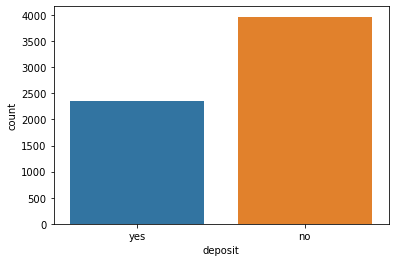

In [68]:
sns.countplot(new_customer_df['deposit'])

In [69]:
label_df=new_customer_df['deposit'].value_counts().index


In [70]:
value_df=new_customer_df['deposit'].value_counts().values


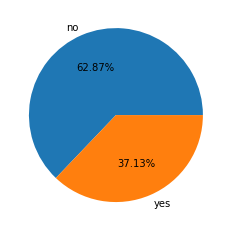

In [71]:
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [72]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


<AxesSubplot:xlabel='marital', ylabel='balance'>

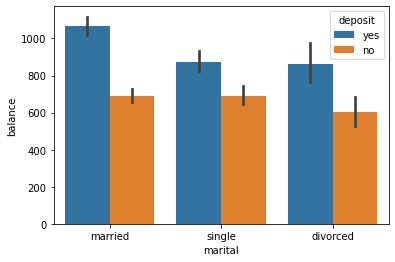

In [73]:
sns.barplot(x=df['marital'],y=df['balance'],hue=df['deposit'])

In [74]:
label_df=df.groupby(['marital','deposit'])['balance'].mean().sort_values(ascending=False).index


In [75]:
value_df=df.groupby(['marital','deposit'])['balance'].mean().sort_values(ascending=False).values


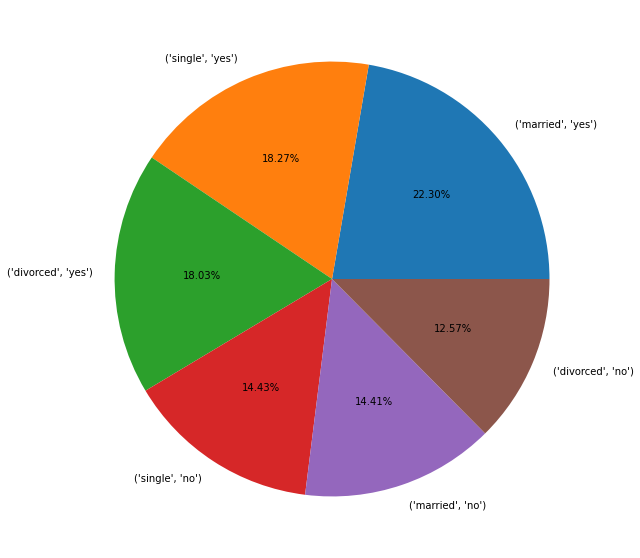

In [76]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='education', ylabel='balance'>

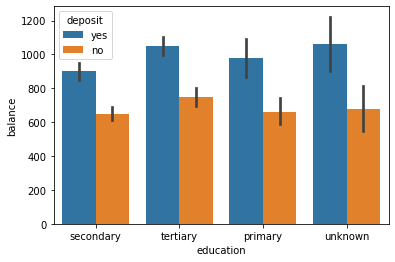

In [77]:
sns.barplot(x=df['education'],y=df['balance'],hue=df['deposit'])

In [78]:
label_df=df.groupby(['education','deposit'])['balance'].mean().sort_values(ascending=False).index


In [79]:
value_df=df.groupby(['education','deposit'])['balance'].mean().sort_values(ascending=False).values


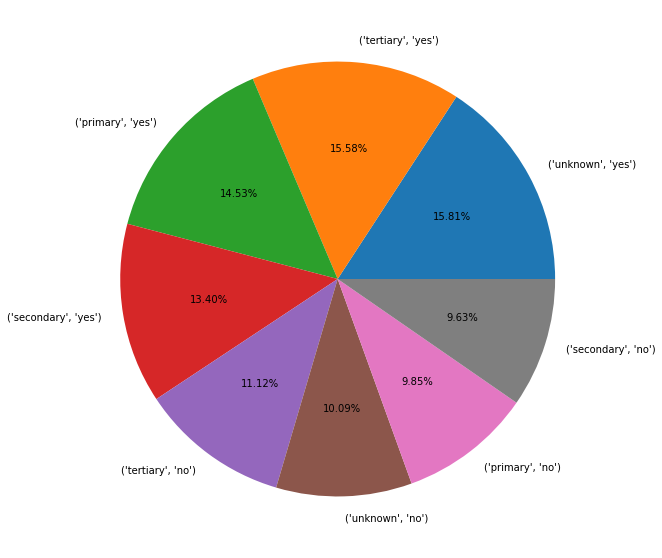

In [80]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

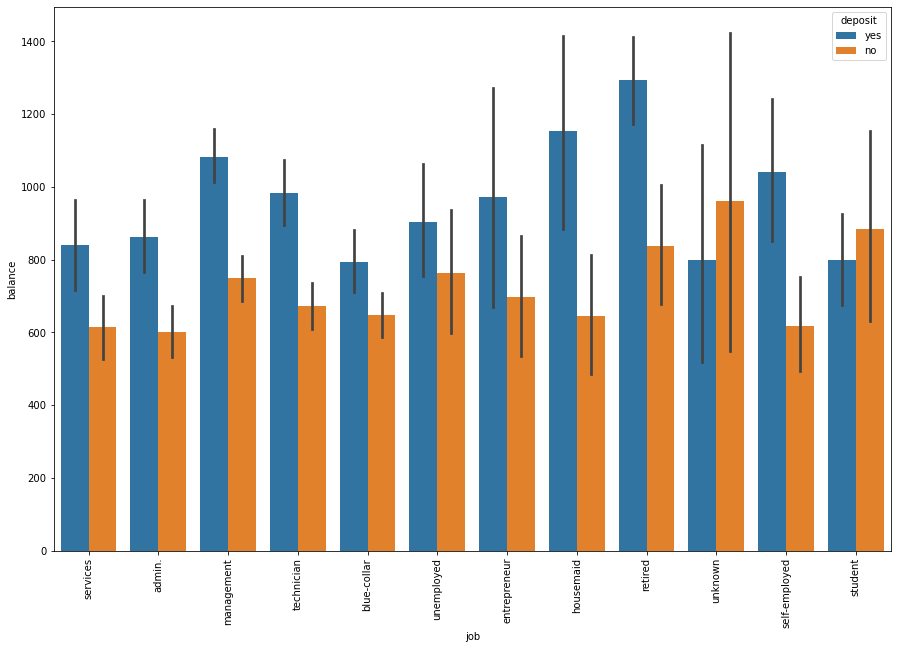

In [81]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['job'],y=df['balance'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

In [82]:
label_df=df.groupby(['job','deposit'])['balance'].mean().sort_values(ascending=False).index


In [83]:
value_df=df.groupby(['job','deposit'])['balance'].mean().sort_values(ascending=False).values


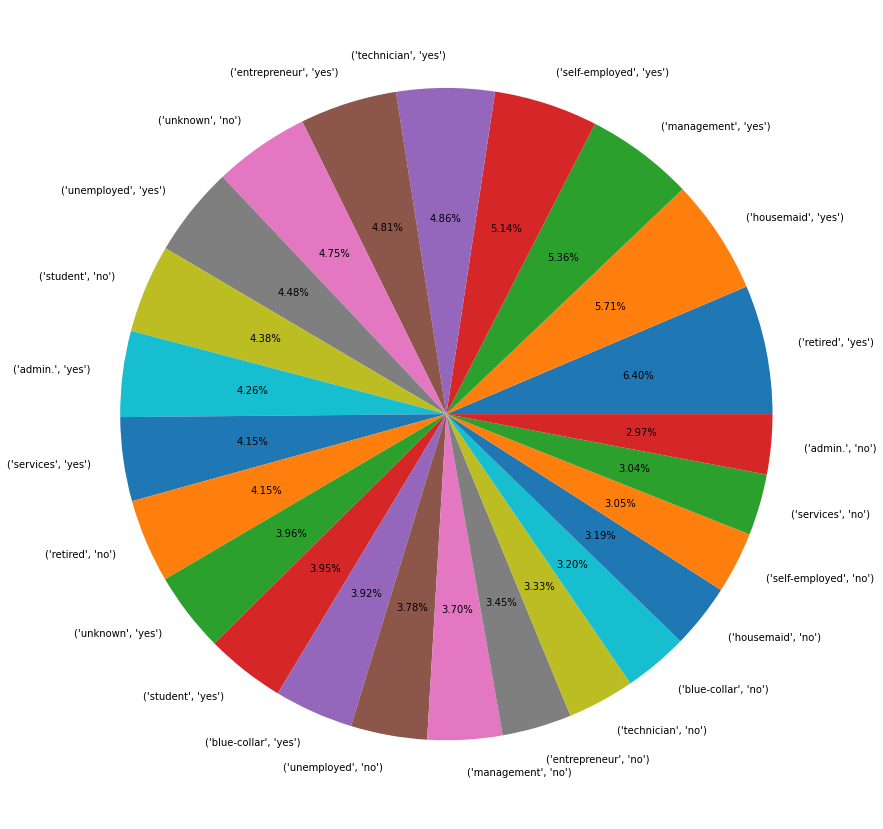

In [84]:
plt.figure(figsize=(15,15))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='housing', ylabel='balance'>

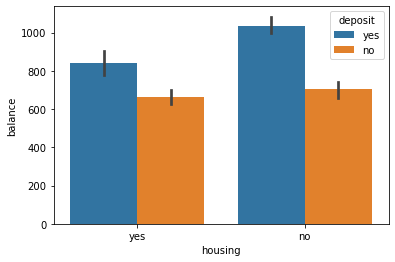

In [85]:
sns.barplot(x=df['housing'],y=df['balance'],hue=df['deposit'])

In [86]:
label_df=df.groupby(['housing','deposit'])['balance'].mean().sort_values(ascending=False).index


In [87]:
value_df=df.groupby(['housing','deposit'])['balance'].mean().sort_values(ascending=False).values


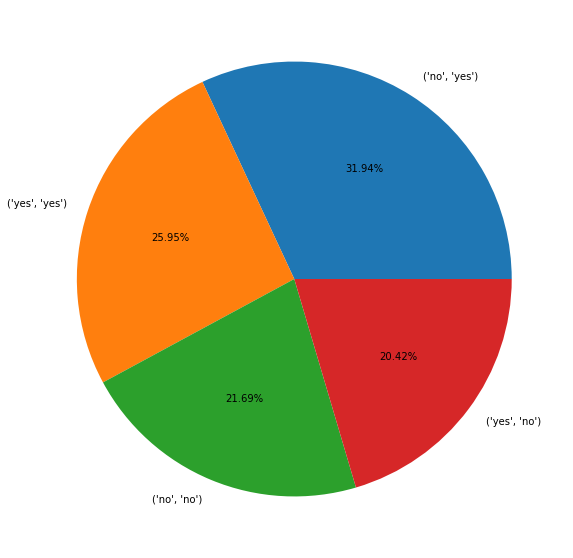

In [88]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='loan', ylabel='balance'>

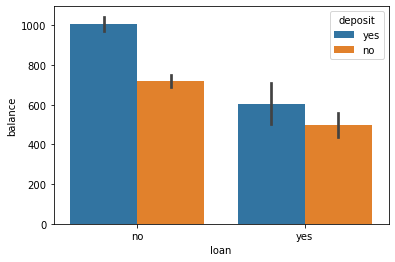

In [89]:
sns.barplot(x=df['loan'],y=df['balance'],hue=df['deposit'])

In [90]:
label_df=df.groupby(['loan','deposit'])['balance'].mean().sort_values(ascending=False).index


In [91]:
value_df=df.groupby(['loan','deposit'])['balance'].mean().sort_values(ascending=False).values


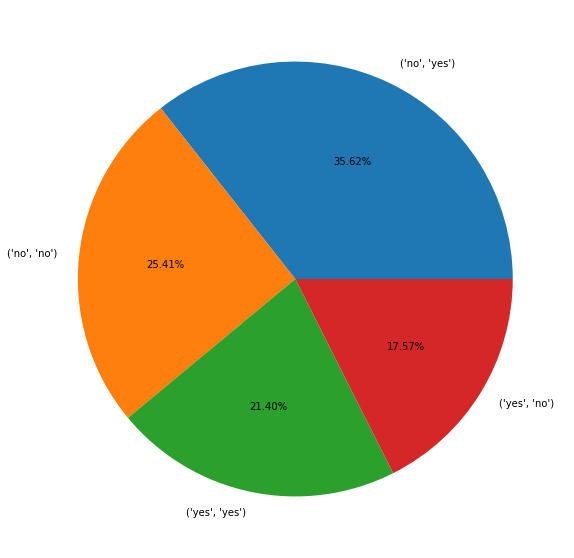

In [92]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='contact', ylabel='balance'>

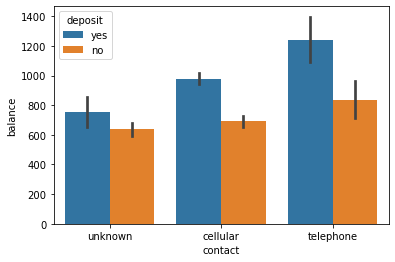

In [93]:
sns.barplot(x=df['contact'],y=df['balance'],hue=df['deposit'])

In [94]:
label_df=df.groupby(['contact','deposit'])['balance'].mean().sort_values(ascending=False).index


In [95]:
value_df=df.groupby(['contact','deposit'])['balance'].mean().sort_values(ascending=False).values


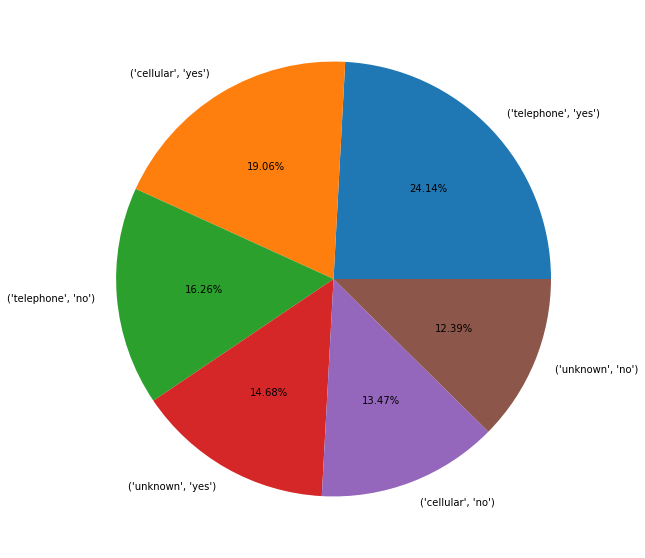

In [96]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='month', ylabel='balance'>

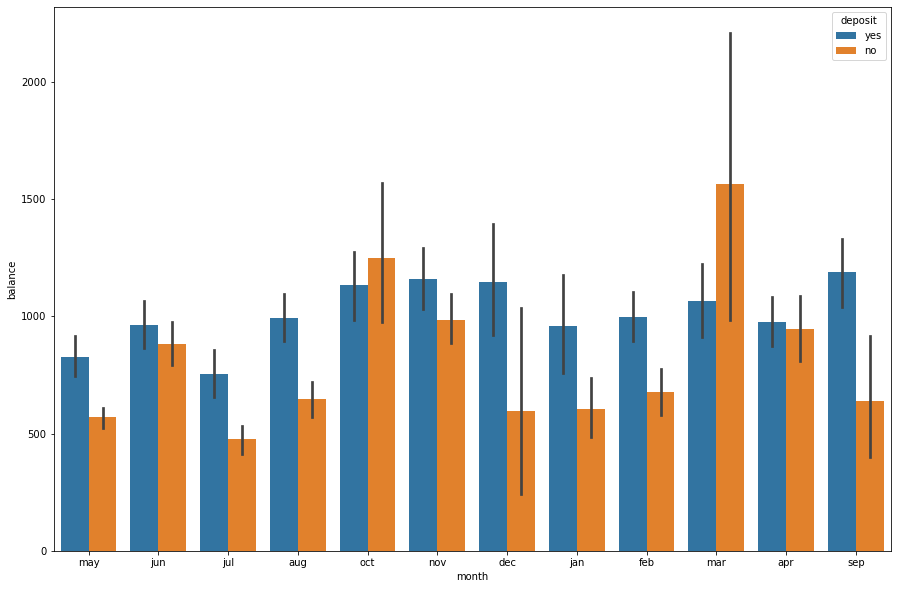

In [97]:
plt.figure(figsize=(15,10))

sns.barplot(x=df['month'],y=df['balance'],hue=df['deposit'])

In [98]:
label_df=df.groupby(['month','deposit'])['balance'].mean().sort_values(ascending=False).index


In [99]:
value_df=df.groupby(['month','deposit'])['balance'].mean().sort_values(ascending=False).values


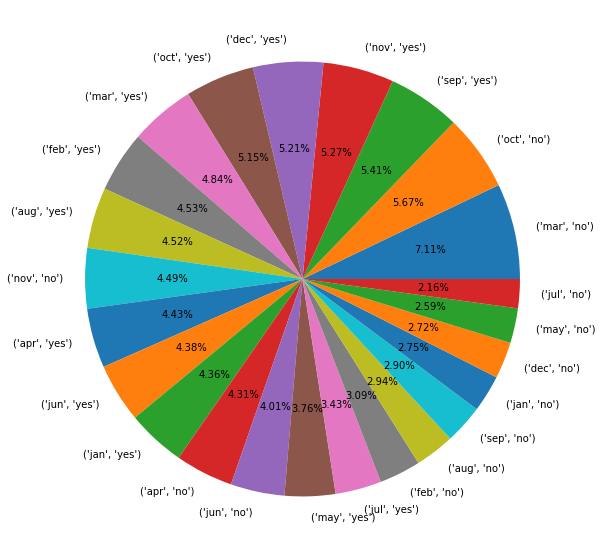

In [100]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='poutcome', ylabel='balance'>

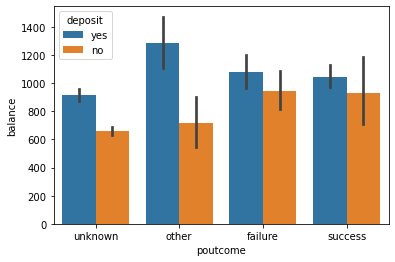

In [101]:
sns.barplot(x=df['poutcome'],y=df['balance'],hue=df['deposit'])

In [102]:
label_df=df.groupby(['poutcome','deposit'])['balance'].mean().sort_values(ascending=False).index


In [103]:
value_df=df.groupby(['poutcome','deposit'])['balance'].mean().sort_values(ascending=False).values


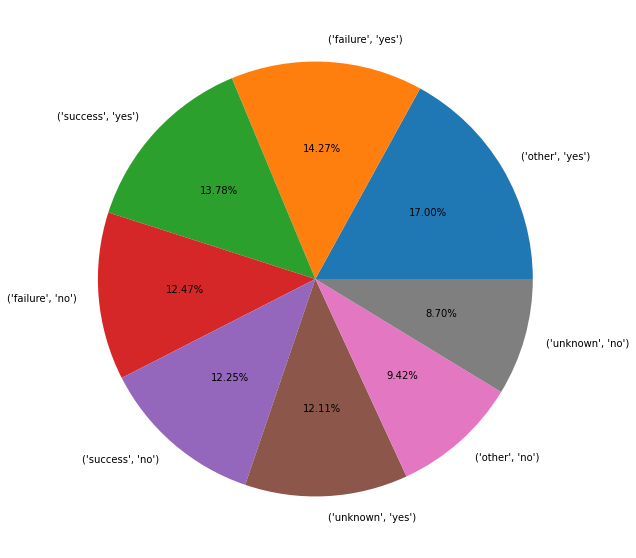

In [104]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='deposit', ylabel='balance'>

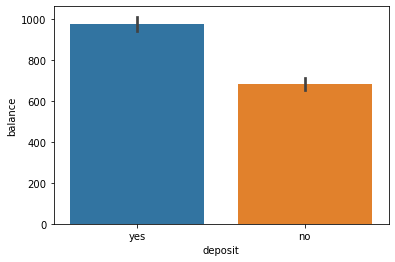

In [105]:
sns.barplot(x=df['deposit'],y=df['balance'])

In [106]:
label_df=df.groupby('deposit')['balance'].mean().sort_values(ascending=False).index


In [107]:
value_df=df.groupby('deposit')['balance'].mean().sort_values(ascending=False).values


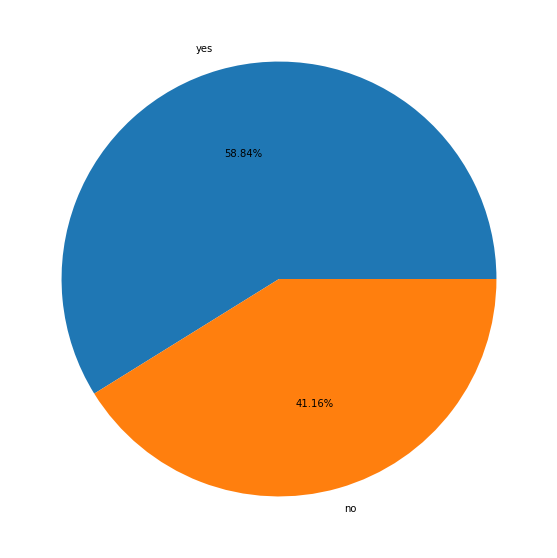

In [108]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='deposit', ylabel='duration'>

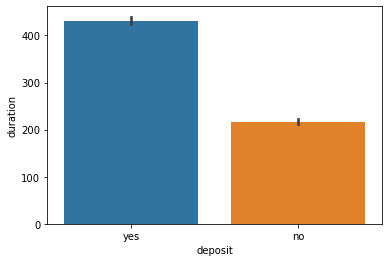

In [109]:
sns.barplot(x=df['deposit'],y=df['duration'])

In [110]:
label_df=df.groupby('deposit')['duration'].mean().sort_values(ascending=False).index


In [111]:
value_df=df.groupby('deposit')['duration'].mean().sort_values(ascending=False).values


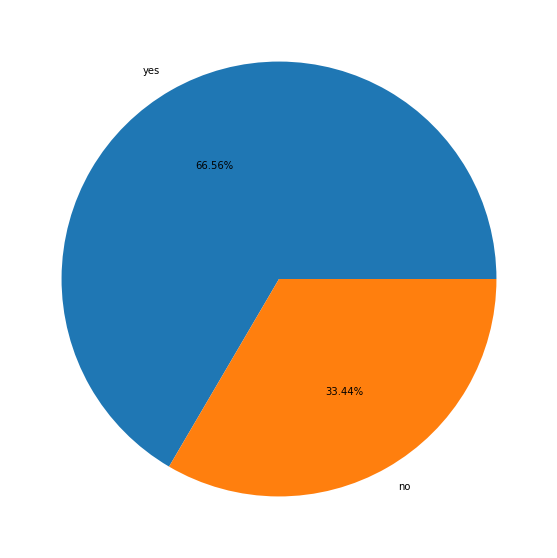

In [112]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [113]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [114]:
df['Age_Range']=pd.qcut(df['age'],5)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\2423771658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_Range']=pd.qcut(df['age'],5)


In [115]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_Range
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(51.0, 74.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(51.0, 74.0]"
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,"(35.0, 42.0]"
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,"(35.0, 42.0]"
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,"(35.0, 42.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(31.0, 35.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 42.0]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(31.0, 35.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(42.0, 51.0]"


<AxesSubplot:xlabel='Age_Range', ylabel='count'>

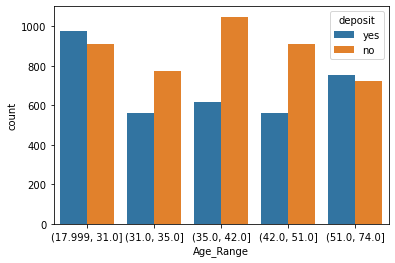

In [116]:
sns.countplot(x=df['Age_Range'],hue=df['deposit'])

In [117]:
label_df=df.groupby(['Age_Range','deposit'])['duration'].size().sort_values(ascending=False).index


In [118]:
value_df=df.groupby(['Age_Range','deposit'])['duration'].size().sort_values(ascending=False).values


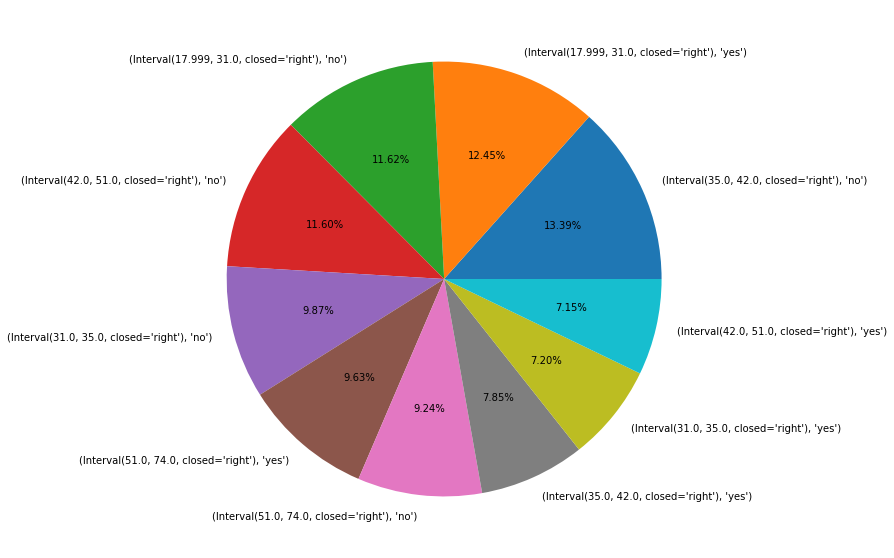

In [119]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Age_Range', ylabel='balance'>

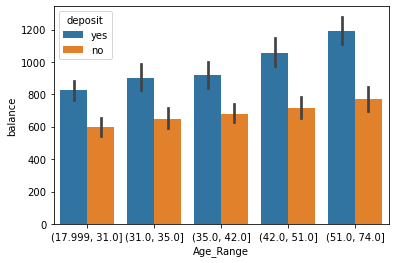

In [120]:
sns.barplot(x=df['Age_Range'],y=df['balance'],hue=df['deposit'])

In [121]:
label_df=df.groupby(['Age_Range','deposit'])['balance'].mean().sort_values(ascending=False).index


In [122]:
value_df=df.groupby(['Age_Range','deposit'])['balance'].mean().sort_values(ascending=False).values


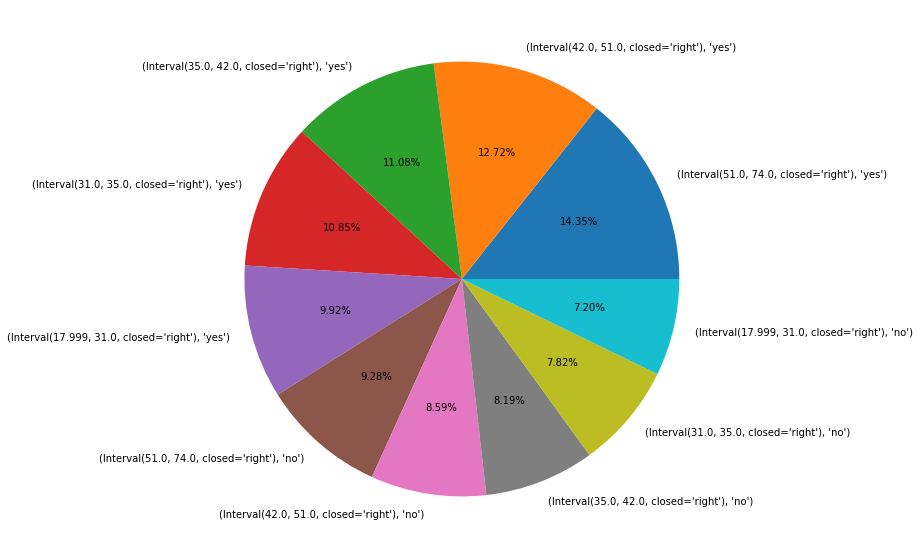

In [123]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Age_Range', ylabel='duration'>

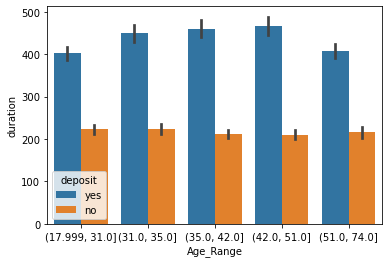

In [124]:
sns.barplot(x=df['Age_Range'],y=df['duration'],hue=df['deposit'])

In [125]:
label_df=df.groupby(['Age_Range','deposit'])['duration'].mean().sort_values(ascending=False).index


In [126]:
value_df=df.groupby(['Age_Range','deposit'])['duration'].mean().sort_values(ascending=False).values


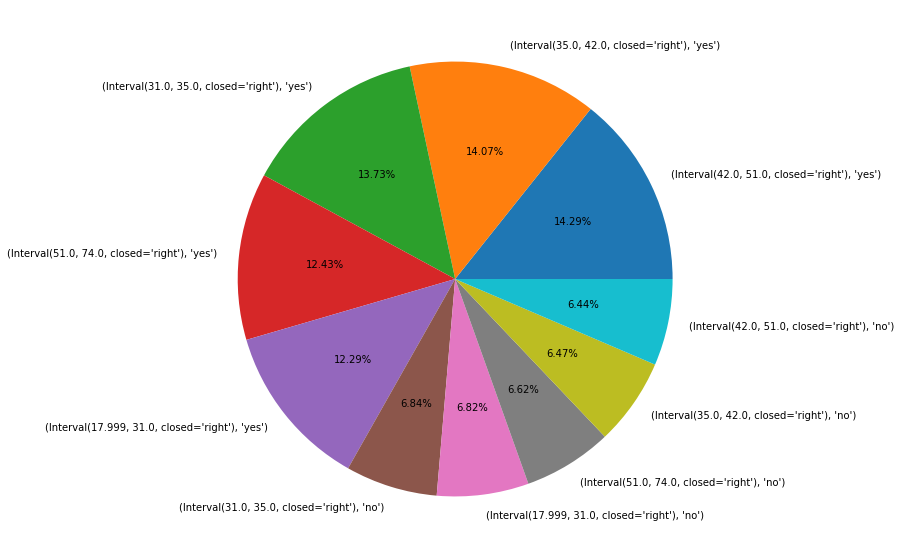

In [127]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [128]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_Range
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(51.0, 74.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(51.0, 74.0]"
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,"(35.0, 42.0]"
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,"(35.0, 42.0]"
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,"(35.0, 42.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(31.0, 35.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 42.0]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(31.0, 35.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(42.0, 51.0]"


<AxesSubplot:xlabel='job', ylabel='balance'>

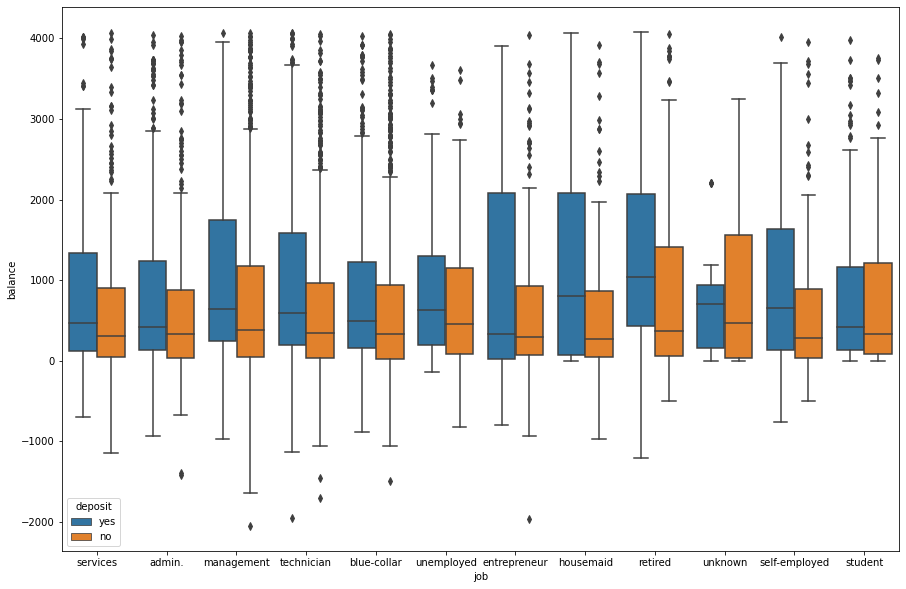

In [129]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['job'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='marital', ylabel='balance'>

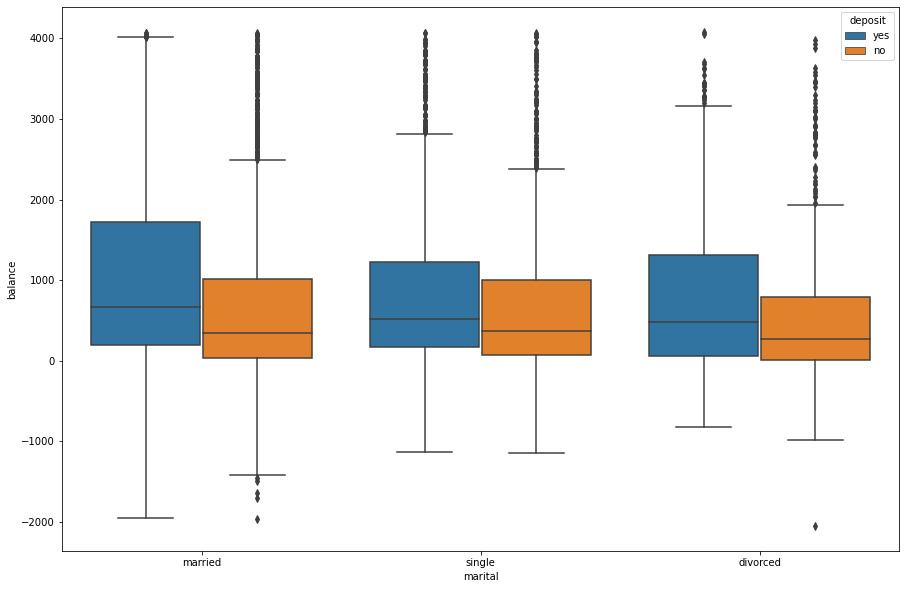

In [130]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['marital'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='education', ylabel='balance'>

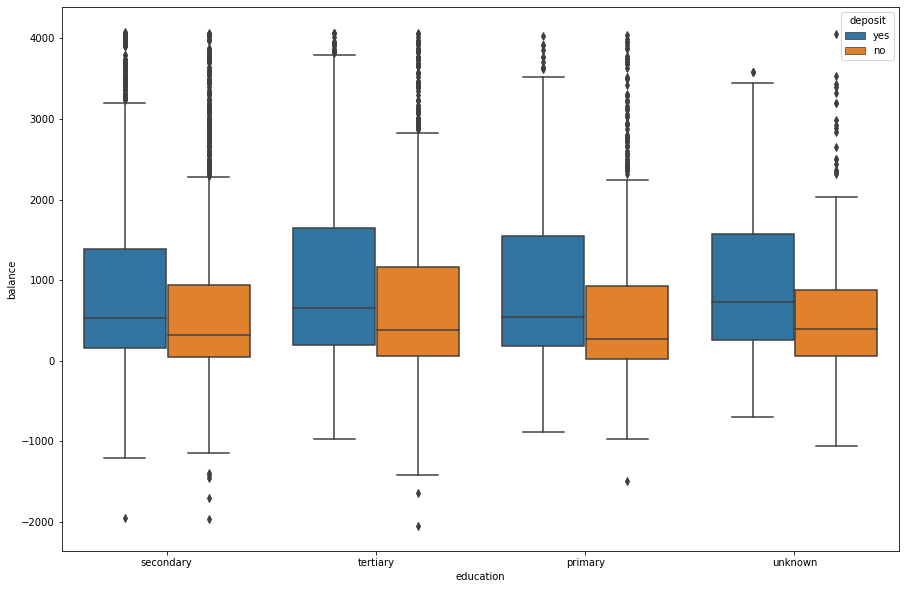

In [131]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['education'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='housing', ylabel='balance'>

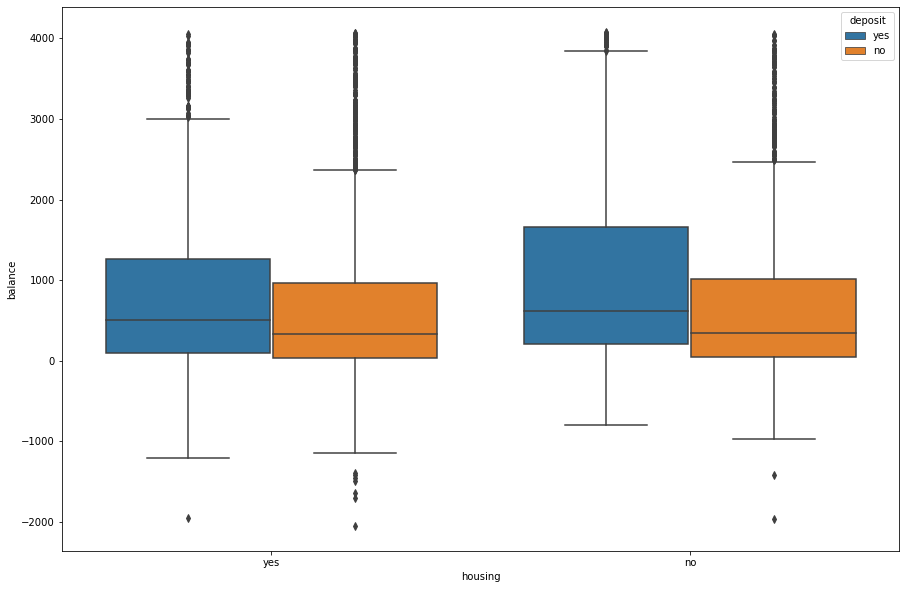

In [132]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['housing'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='loan', ylabel='balance'>

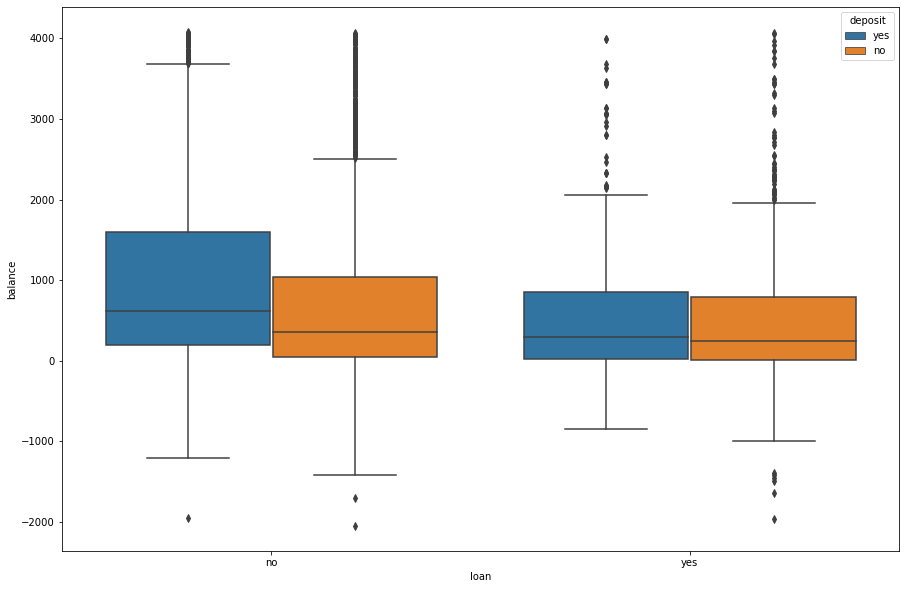

In [133]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['loan'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='contact', ylabel='balance'>

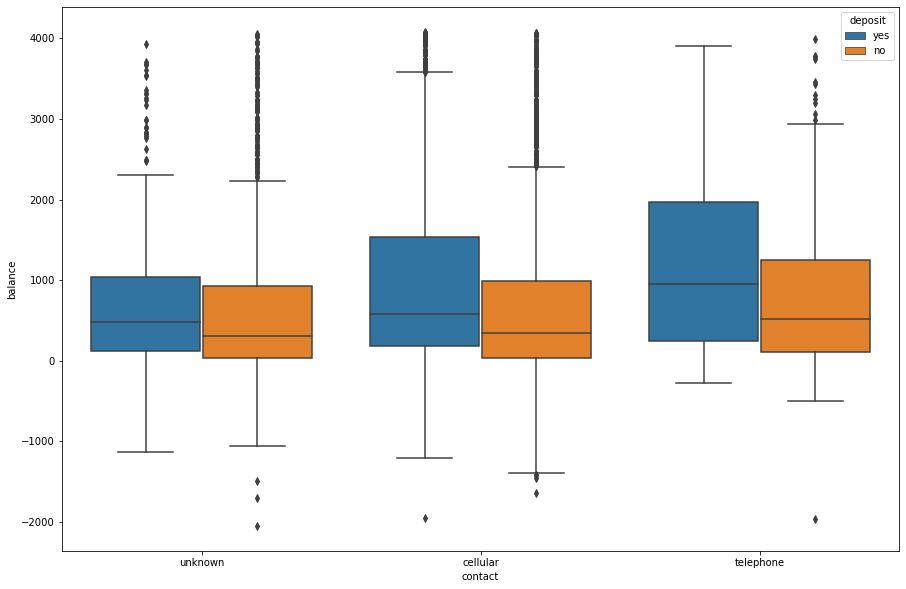

In [134]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['contact'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='month', ylabel='balance'>

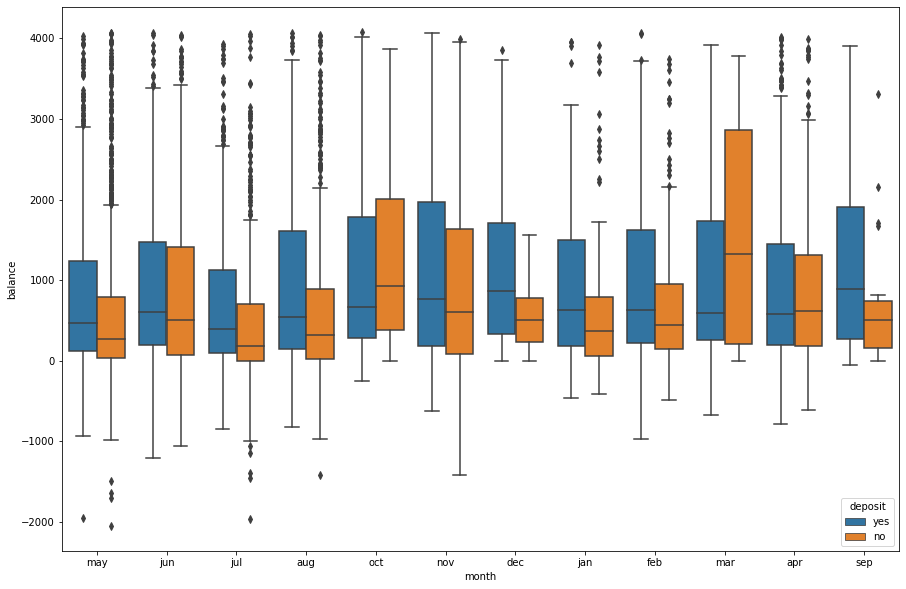

In [135]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['month'],y=df['balance'],hue=df['deposit'])

<AxesSubplot:xlabel='month', ylabel='duration'>

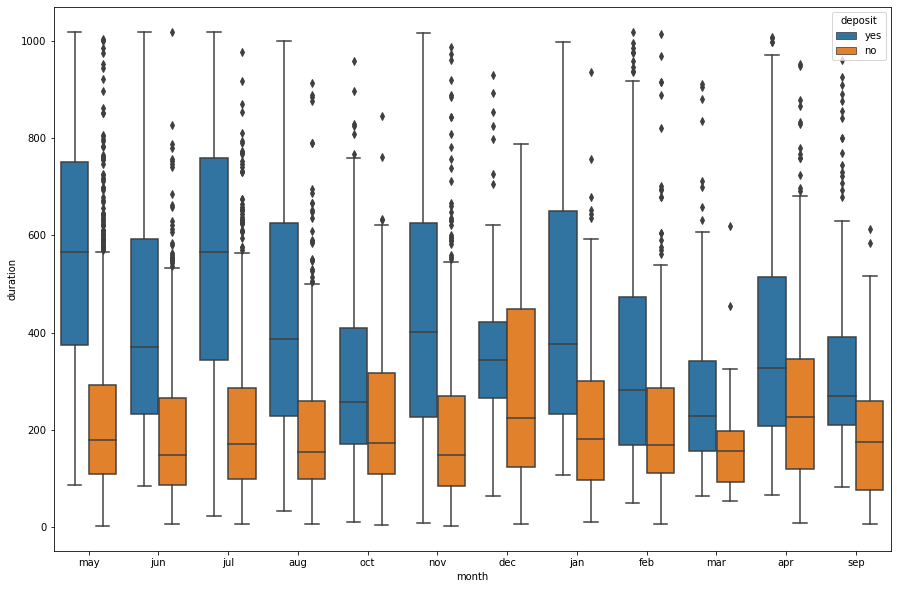

In [136]:
plt.figure(figsize=(15,10))
sns.boxplot(x=df['month'],y=df['duration'],hue=df['deposit'])

In [137]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_Range
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(51.0, 74.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(51.0, 74.0]"
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,"(35.0, 42.0]"
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,"(35.0, 42.0]"
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,"(35.0, 42.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(31.0, 35.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 42.0]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(31.0, 35.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(42.0, 51.0]"


In [138]:
df['balance_range']=pd.qcut(df['balance'],5)

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\3454050191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['balance_range']=pd.qcut(df['balance'],5)


In [139]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_Range,balance_range
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(51.0, 74.0]","(1524.6, 4079.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(51.0, 74.0]","(41.0, 280.0]"
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,"(35.0, 42.0]","(-2049.001, 41.0]"
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,"(35.0, 42.0]","(-2049.001, 41.0]"
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,"(35.0, 42.0]","(41.0, 280.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(31.0, 35.0]","(-2049.001, 41.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 42.0]","(658.0, 1524.6]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(31.0, 35.0]","(-2049.001, 41.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(42.0, 51.0]","(-2049.001, 41.0]"


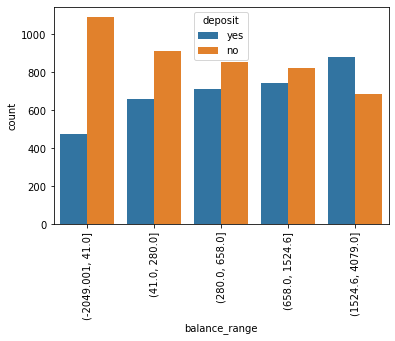

In [140]:
sns.countplot(x=df['balance_range'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

In [141]:
label_df=df.groupby(['balance_range','deposit']).size().sort_values(ascending=False).index


In [142]:
value_df=df.groupby(['balance_range','deposit']).size().sort_values(ascending=False).values


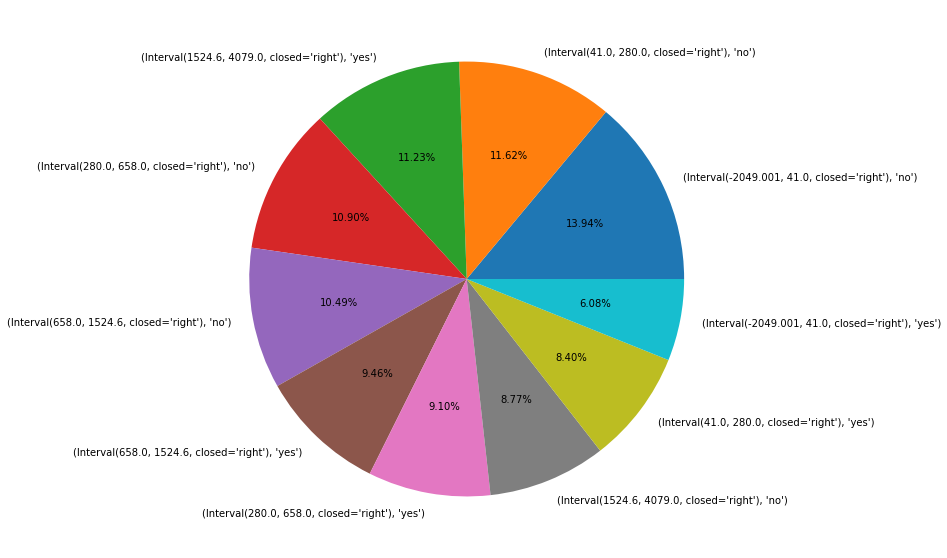

In [143]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='balance_range', ylabel='duration'>

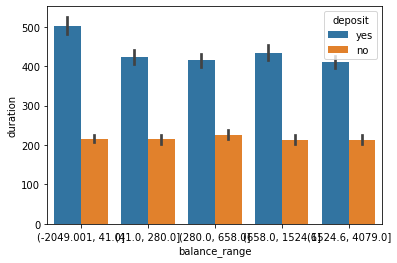

In [144]:
sns.barplot(x=df['balance_range'],y=df['duration'],hue=df['deposit'])


In [145]:
label_df=df.groupby(['balance_range','deposit'])['duration'].mean().sort_values(ascending=False).index


In [146]:
value_df=df.groupby(['balance_range','deposit'])['duration'].mean().sort_values(ascending=False).values


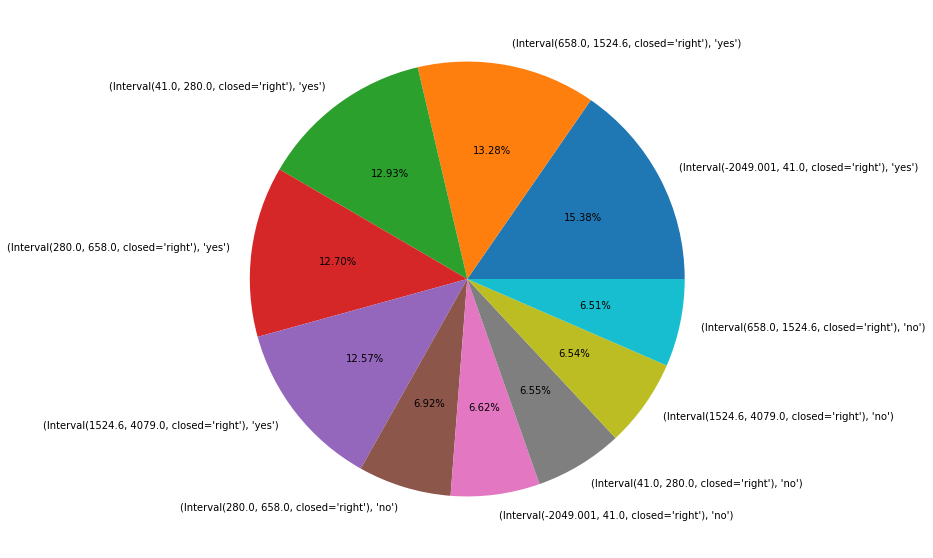

In [147]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

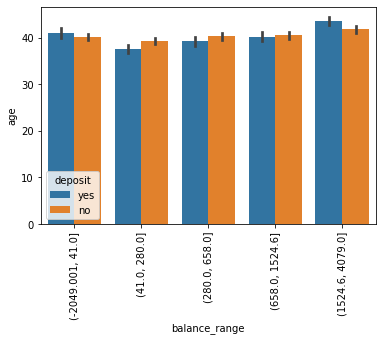

In [148]:
sns.barplot(x=df['balance_range'],y=df['age'],hue=df['deposit'])
plt.xticks(rotation=90)
plt.show()

In [149]:
label_df=df.groupby(['balance_range','deposit'])['age'].mean().sort_values(ascending=False).index


In [150]:
value_df=df.groupby(['balance_range','deposit'])['age'].mean().sort_values(ascending=False).values


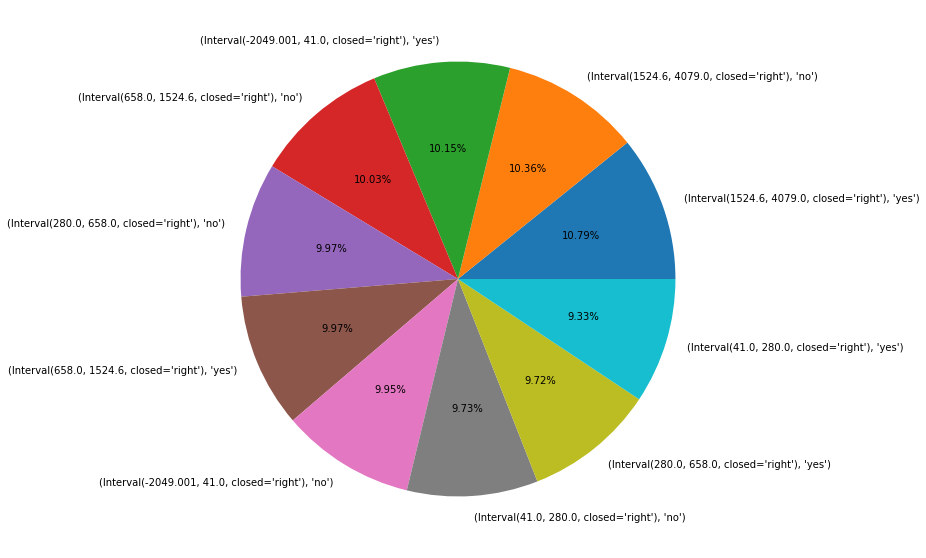

In [151]:
plt.figure(figsize=(10,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [152]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_Range,balance_range
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,"(51.0, 74.0]","(1524.6, 4079.0]"
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,"(51.0, 74.0]","(41.0, 280.0]"
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,"(35.0, 42.0]","(-2049.001, 41.0]"
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,"(35.0, 42.0]","(-2049.001, 41.0]"
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes,"(35.0, 42.0]","(41.0, 280.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,"(31.0, 35.0]","(-2049.001, 41.0]"
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,"(35.0, 42.0]","(658.0, 1524.6]"
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,"(31.0, 35.0]","(-2049.001, 41.0]"
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,"(42.0, 51.0]","(-2049.001, 41.0]"


In [153]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000,7833.000000
mean,40.404570,810.041108,15.490234,312.009064,1.922635,24.753990,0.623899
std,11.131405,1001.298302,8.475250,231.986510,1.106389,57.056601,1.721032
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,94.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,441.000000,15.000000,242.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,21.000000,426.000000,2.000000,-1.000000,0.000000
max,74.000000,4079.000000,31.000000,1018.000000,5.000000,216.000000,20.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

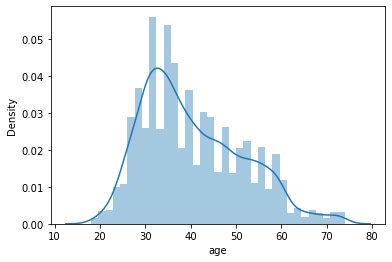

In [154]:
sns.distplot(df['age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='balance', ylabel='Density'>

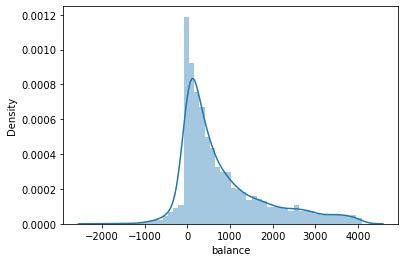

In [155]:
sns.distplot(df['balance'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

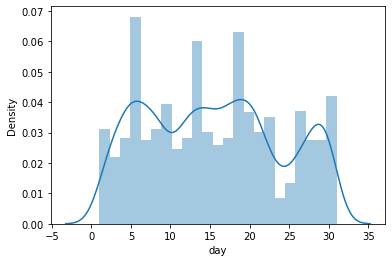

In [156]:
sns.distplot(df['day'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

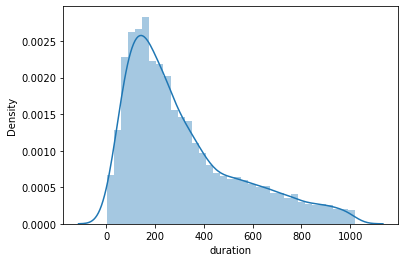

In [157]:
sns.distplot(df['duration'])

In [158]:
df['duration']=np.sqrt(df['duration'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\89335862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration']=np.sqrt(df['duration'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

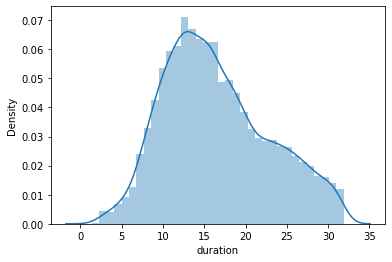

In [159]:
sns.distplot(df['duration'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

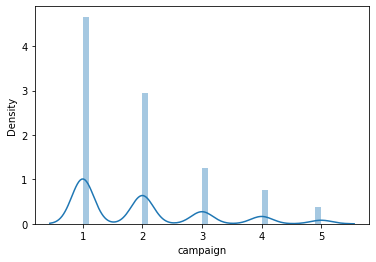

In [160]:
sns.distplot(df['campaign'])

In [161]:
df['campaign']=np.log(df['campaign'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\2263554591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['campaign']=np.log(df['campaign'])


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign', ylabel='Density'>

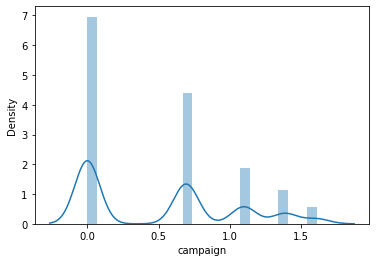

In [162]:
sns.distplot(df['campaign'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

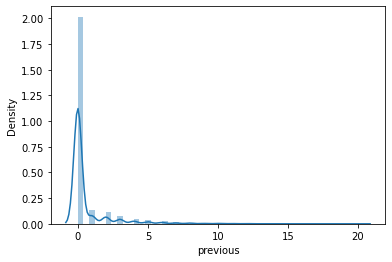

In [163]:
sns.distplot(df['previous'])

In [164]:
df['previous']=np.log(df['previous'])


C:\Users\himanshu\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\2617784820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['previous']=np.log(df['previous'])


In [165]:
df=df[df['previous']>0]


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='previous', ylabel='Density'>

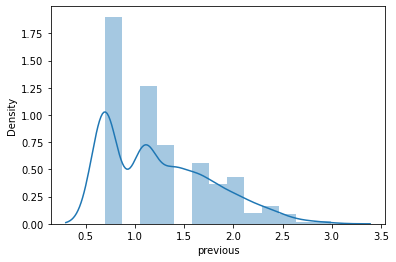

In [166]:
sns.distplot(df['previous'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pdays', ylabel='Density'>

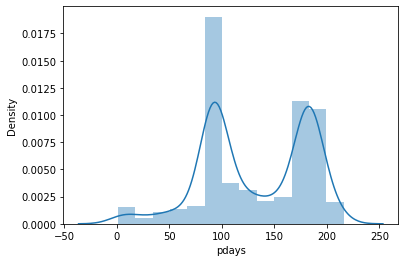

In [167]:
sns.distplot(df['pdays'])

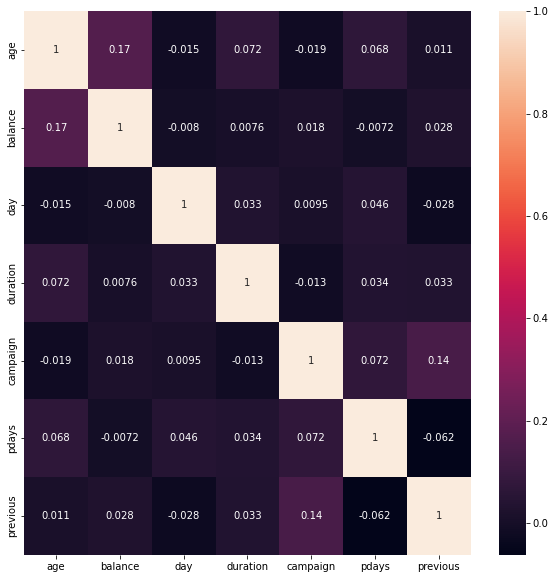

In [168]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

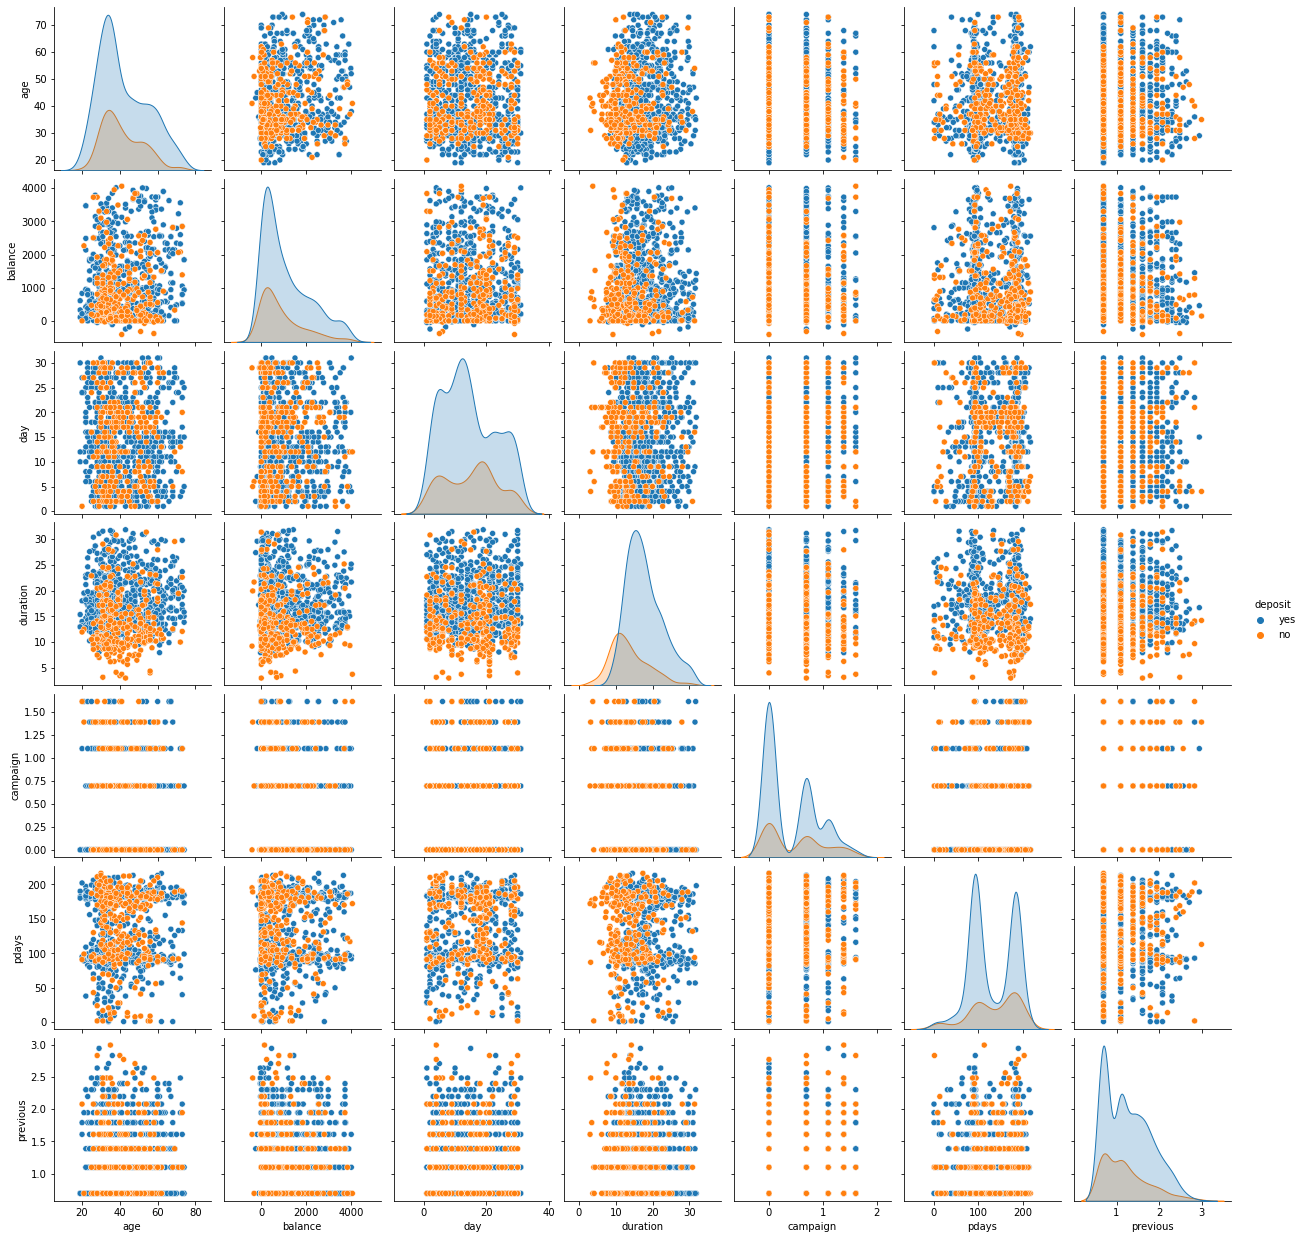

In [169]:
sns.pairplot(df,hue='deposit')

In [170]:
le=LabelEncoder()


In [171]:
df['job']=le.fit_transform(df['job'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\656169983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=le.fit_transform(df['job'])


In [172]:
df['marital']=le.fit_transform(df['marital'])


C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\3458206127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['marital']=le.fit_transform(df['marital'])


In [173]:
df['education']=le.fit_transform(df['education'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\2636379020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education']=le.fit_transform(df['education'])


In [174]:
df['default']=le.fit_transform(df['default'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\1553406247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['default']=le.fit_transform(df['default'])


In [175]:
df['housing']=le.fit_transform(df['housing'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\4054548197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['housing']=le.fit_transform(df['housing'])


In [176]:
df['loan']=le.fit_transform(df['loan'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\866784536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loan']=le.fit_transform(df['loan'])


In [177]:
df['contact']=le.fit_transform(df['contact'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\2246305202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['contact']=le.fit_transform(df['contact'])


In [178]:
df['month']=le.fit_transform(df['month'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\1386839180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=le.fit_transform(df['month'])


In [179]:
df['poutcome']=le.fit_transform(df['poutcome'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\2295512355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['poutcome']=le.fit_transform(df['poutcome'])


In [180]:
df['deposit']=le.fit_transform(df['poutcome'])

C:\Users\himanshu\AppData\Local\Temp\ipykernel_34184\3771493307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deposit']=le.fit_transform(df['poutcome'])


In [181]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Age_Range,balance_range
891,33,7,1,1,0,3444,1,0,1,21,10,12.000000,0.000000,91,1.386294,0,0,"(31.0, 35.0]","(1524.6, 4079.0]"
899,56,9,1,1,0,589,1,0,2,23,10,22.759613,0.000000,147,0.693147,2,2,"(51.0, 74.0]","(280.0, 658.0]"
933,34,0,1,2,0,899,1,0,2,12,9,10.677078,0.000000,170,1.098612,0,0,"(31.0, 35.0]","(658.0, 1524.6]"
953,45,2,1,1,0,781,0,1,0,17,9,25.534291,0.693147,126,0.693147,0,0,"(42.0, 51.0]","(658.0, 1524.6]"
968,46,4,1,2,0,0,0,0,0,18,9,26.758176,0.693147,110,1.098612,1,1,"(42.0, 51.0]","(-2049.001, 41.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11069,33,6,2,2,0,658,1,0,0,12,0,9.643651,0.000000,173,0.693147,2,2,"(31.0, 35.0]","(280.0, 658.0]"
11080,25,7,2,1,0,199,0,0,0,16,1,10.535654,0.693147,95,1.098612,1,1,"(17.999, 31.0]","(41.0, 280.0]"
11092,38,7,1,2,0,0,1,0,0,17,0,15.459625,0.000000,147,1.386294,0,0,"(35.0, 42.0]","(-2049.001, 41.0]"
11155,35,1,1,1,0,80,1,1,0,21,9,6.164414,0.693147,172,0.693147,0,0,"(31.0, 35.0]","(41.0, 280.0]"


In [182]:
df=df.drop(['Age_Range','balance_range'],axis=1)


In [183]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
891,33,7,1,1,0,3444,1,0,1,21,10,12.000000,0.000000,91,1.386294,0,0
899,56,9,1,1,0,589,1,0,2,23,10,22.759613,0.000000,147,0.693147,2,2
933,34,0,1,2,0,899,1,0,2,12,9,10.677078,0.000000,170,1.098612,0,0
953,45,2,1,1,0,781,0,1,0,17,9,25.534291,0.693147,126,0.693147,0,0
968,46,4,1,2,0,0,0,0,0,18,9,26.758176,0.693147,110,1.098612,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11069,33,6,2,2,0,658,1,0,0,12,0,9.643651,0.000000,173,0.693147,2,2
11080,25,7,2,1,0,199,0,0,0,16,1,10.535654,0.693147,95,1.098612,1,1
11092,38,7,1,2,0,0,1,0,0,17,0,15.459625,0.000000,147,1.386294,0,0
11155,35,1,1,1,0,80,1,1,0,21,9,6.164414,0.693147,172,0.693147,0,0


In [184]:
sc=StandardScaler()


In [185]:
y=df['deposit']

In [186]:
X=df.drop('deposit',axis=1)

In [187]:
X=sc.fit_transform(X)


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [189]:
X_test.shape

(359, 16)

In [190]:
X_train.shape

(727, 16)

In [191]:
lr=LogisticRegression()

In [192]:
lr.fit(X_train,y_train)

LogisticRegression()

In [193]:
y_pred=lr.predict(X_test)


In [194]:
accuracy_score(y_test,y_pred)

1.0

In [195]:
mean_squared_error(y_test,y_pred)

0.0

In [196]:
confusion_matrix(y_test,y_pred)

array([[115,   0,   0],
       [  0,  64,   0],
       [  0,   0, 180]], dtype=int64)

In [197]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00       180

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



In [198]:
rfc=RandomForestClassifier()


In [199]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [200]:
y_pred=rfc.predict(X_test)


In [201]:
accuracy_score(y_test,y_pred)

1.0

In [202]:
mean_squared_error(y_test,y_pred)

0.0

In [203]:
confusion_matrix(y_test,y_pred)

array([[115,   0,   0],
       [  0,  64,   0],
       [  0,   0, 180]], dtype=int64)

In [204]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        64
           2       1.00      1.00      1.00       180

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359

